In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
cd OneDrive\Desktop

C:\Users\nehag\OneDrive\Desktop


In [3]:
dataset = pd.read_csv('MRI_DATA.csv')
dataset

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
0,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.648,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85
1,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.660,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85
2,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.597,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86
3,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.604,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87
4,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.597,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,/home/maheen.hossain/freesurfer/sub-CC722542_T1w,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.457,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79
4222,/home/maheen.hossain/freesurfer/sub-CC722651_T1w,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.497,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79
4223,/home/maheen.hossain/freesurfer/sub-CC722891_T1w,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.407,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84
4224,/home/maheen.hossain/freesurfer/sub-CC723197_T1w,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.700,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80


array([[<AxesSubplot:title={'center':'Left-Lateral-Ventricle'}>,
        <AxesSubplot:title={'center':'Left-Inf-Lat-Vent'}>,
        <AxesSubplot:title={'center':'Left-Cerebellum-White-Matter'}>,
        <AxesSubplot:title={'center':'Left-Cerebellum-Cortex'}>],
       [<AxesSubplot:title={'center':'Left-Thalamus'}>,
        <AxesSubplot:title={'center':'Left-Caudate'}>,
        <AxesSubplot:title={'center':'Left-Putamen'}>,
        <AxesSubplot:title={'center':'Left-Pallidum'}>],
       [<AxesSubplot:title={'center':'3rd-Ventricle'}>,
        <AxesSubplot:title={'center':'4th-Ventricle'}>,
        <AxesSubplot:title={'center':'Brain-Stem'}>,
        <AxesSubplot:title={'center':'Left-Hippocampus'}>],
       [<AxesSubplot:title={'center':'Left-Amygdala'}>,
        <AxesSubplot:title={'center':'CSF'}>,
        <AxesSubplot:title={'center':'Left-Accumbens-area'}>,
        <AxesSubplot:title={'center':'Left-VentralDC'}>],
       [<AxesSubplot:title={'center':'Left-vessel'}>,
        <AxesS

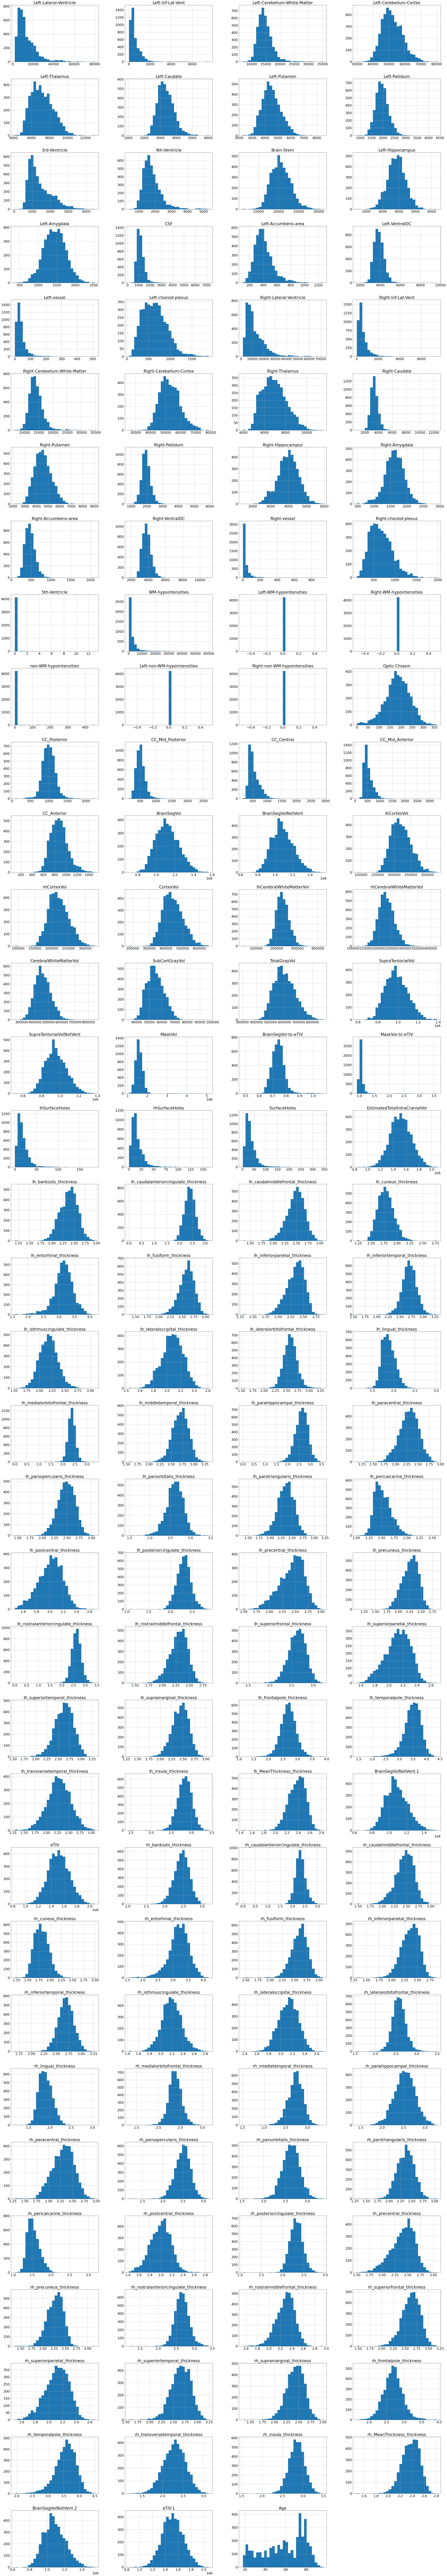

In [20]:
plt.rcParams.update({'font.size': 22})
dataset.hist(figsize=(50,350),bins=30, layout=(40,4))

In [4]:
X = dataset.iloc[:, 1:139].values
X

array([[2.29169000e+04, 9.82700000e+02, 1.51967000e+04, ...,
        2.33635000e+00, 1.09384600e+06, 1.61960297e+06],
       [2.29532000e+04, 9.84500000e+02, 1.52897000e+04, ...,
        2.34202000e+00, 1.09987600e+06, 1.62475513e+06],
       [2.33204000e+04, 1.06210000e+03, 1.53821000e+04, ...,
        2.31982000e+00, 1.09799900e+06, 1.62260952e+06],
       ...,
       [3.44679000e+04, 1.65960000e+03, 1.27445000e+04, ...,
        2.19622000e+00, 1.03335700e+06, 1.60432335e+06],
       [3.16275000e+04, 1.33440000e+03, 1.58832000e+04, ...,
        2.43580000e+00, 1.07333900e+06, 1.62089180e+06],
       [1.48794000e+04, 7.04200000e+02, 1.13466000e+04, ...,
        2.43420000e+00, 9.92086000e+05, 1.51307604e+06]])

In [5]:
y = dataset.iloc[:, 139].values
y

array([85, 85, 86, ..., 84, 80, 86], dtype=int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 1. BASIC LINEAR REGRESSION

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Intercept:')
print(regressor.intercept_)
print('\n Coefficients: \n', regressor.coef_)

Intercept:
98.84255463928866

 Coefficients: 
 [-5.42934911e-03 -4.11039223e-03  9.26377204e-04 -1.39116432e-04
 -7.06112934e-03 -4.56582182e-03 -6.09077305e-03 -1.92351289e-03
 -2.40703372e-03 -6.94214371e-03  2.22448619e-03 -4.14079917e-03
 -9.50025251e-03 -5.43451087e-03 -1.15760662e-02 -6.11526305e-03
  1.97483758e-02 -2.99950096e-03 -5.56958448e-03 -6.19529981e-03
  6.99201785e-04 -2.44922452e-04 -7.30204487e-03 -4.03596969e-03
 -6.37393920e-03 -4.27775916e-03 -5.23706519e-03  1.70385469e-03
 -1.23951336e-02 -9.32583291e-03  9.97334535e-03 -4.09303675e-03
  3.15403166e-02  1.71699008e-04  1.03493847e-07 -6.11220718e-07
  6.62447078e-03 -4.99795094e-07 -4.75608726e-07  2.42775405e-02
  7.32690789e-03 -3.80510784e-03 -4.32917493e-03  3.78998376e-03
 -8.35437693e-03  3.01833060e-03 -1.28239651e-03 -1.95790356e+03
 -1.95790367e+03  1.95790280e+03 -3.31845019e-05  1.01426851e-04
  3.91607586e-05  4.01413593e-03  7.60038541e-04  2.41709659e-03
 -1.69513904e-03  2.06186795e-05  3.0784827

In [13]:
print('R_square score on the training: %.2f' % regressor.score(X_train, y_train))


R_square score on the training: 0.86


In [9]:
y_pred = regressor.predict(X_test)
y_pred

array([ 23.03809566,  49.07102175,  68.65446312,  50.80482091,
        86.64001657,  28.00149823,  64.80789442,  27.71646679,
        32.88154216,  87.75494857,  40.28709448,  26.73611529,
        75.14582987,  67.75485886,  65.96819777,  82.97340805,
        27.8093893 ,  85.7214166 ,  30.18486453,  74.69947458,
        74.39487411,  32.1213807 ,  36.61346121,  64.11110104,
        84.25632287,  65.9109918 ,  53.68645711,  80.95941366,
        69.18034507,  38.81095458,  97.48777957,  44.44282878,
        85.29229708,  83.78354783,  36.71226115,  70.86005778,
        80.3293447 ,  27.12037552,  76.33703877,  78.7363453 ,
        83.50456775,  44.29497773,  71.98930336,  37.71034951,
        81.04849411,  82.75565411,  34.83287848,  57.15156395,
        62.45019783,  62.94590826,  49.70002158,  54.4641564 ,
        47.98279066,  72.48994447,  41.86621673,  86.62333311,
        81.04739327,  49.12351794,  27.75389327,  42.90581364,
        39.31399835,  47.88687427,  49.99452437,  77.81

In [18]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean squared error: 63.04
Mean absolute error: 6.33
Root mean squared error: 7.94


In [19]:
print('R_square score on test: %.2f' % r2_score(y_test, y_pred))

R_square score on test: 0.85


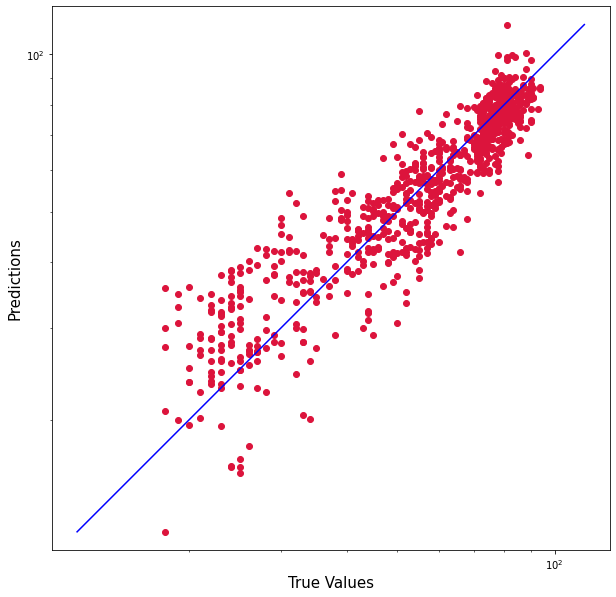

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [30]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))

MAE: LinearRegression 6.326584770655144
MAE: KNeighborsRegressor 8.19550827423168
MAE: SVR 13.609456288662901


## min max scaler on features

In [36]:
X = dataset.iloc[:, 1:139]
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
type(rescaledX)

# Convert X back to a Pandas DataFrame, for convenience
X_scaled = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [41]:
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)),'\n')
    

MAE: LinearRegression 6.326584745759277
MSE: LinearRegression 63.035163866766425
RMSE: LinearRegression 7.939468739579898 

MAE: KNeighborsRegressor 5.6517730496453895
MSE: KNeighborsRegressor 67.48099290780142
RMSE: KNeighborsRegressor 8.21468154634137 

MAE: SVR 6.718469081078333
MSE: SVR 74.83000318535098
RMSE: SVR 8.650433699263349 

MAE: DecisionTreeRegressor 7.83806146572104
MSE: DecisionTreeRegressor 128.03427895981088
RMSE: DecisionTreeRegressor 11.315223327880492 



## with simple cross validation

In [9]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores  

array([0.82486028, 0.82521663, 0.8423111 , 0.86101694, 0.83413102,
       0.22834218, 0.84141595, 0.84275829, 0.86124224, 0.86796256])

In [10]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores 

array([0.84559816, 0.85934544, 0.85794981, 0.79320705, 0.85032305,
       0.82638742, 0.1356601 , 0.85228583, 0.83407374, 0.84995646])

In [17]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
print(scores)
print('Average (-ve) MAE: ', scores.mean())

[-6.37540641 -6.61403965 -6.12648145 -5.54220428 -6.58322255 -7.02584858
 -6.17600236 -6.33442027 -5.98343711 -5.53580127]
Average (-ve) MAE:  -6.229686393968219


In [19]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print("TEST : Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("TEST : Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("TEST : Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

TEST : Mean squared error: 63.04
TEST : Mean absolute error: 6.33
TEST : Root mean squared error: 7.94


In [20]:
dataset

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
0,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.648,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85
1,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.660,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85
2,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.597,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86
3,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.604,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87
4,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.597,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,/home/maheen.hossain/freesurfer/sub-CC722542_T1w,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.457,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79
4222,/home/maheen.hossain/freesurfer/sub-CC722651_T1w,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.497,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79
4223,/home/maheen.hossain/freesurfer/sub-CC722891_T1w,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.407,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84
4224,/home/maheen.hossain/freesurfer/sub-CC723197_T1w,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.700,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80


In [21]:
dataset['Measure:volume'].unique()

array(['/home/harshal.patel/freesurfer/ADNI_002_S_0295_MR_MP-RAGE_REPEAT_br_raw_20060418194821744_1_S13407_I13721',
       '/home/harshal.patel/freesurfer/ADNI_002_S_0295_MR_MP-RAGE_REPEAT_br_raw_20061102125417313_1_S21855_I28560',
       '/home/harshal.patel/freesurfer/ADNI_002_S_0295_MR_MP-RAGE_REPEAT_br_raw_20070525135751089_1_S32679_I55276',
       ..., '/home/maheen.hossain/freesurfer/sub-CC722891_T1w',
       '/home/maheen.hossain/freesurfer/sub-CC723197_T1w',
       '/home/maheen.hossain/freesurfer/sub-CC723395_T1w'], dtype=object)

In [ ]:
/ADNI - adni
/NORM - NORMATIVE
/B_HC** - 
/IXI - Brain Development
/OAS1 - oasis
/sub-  - 
/CC - calgary campinas


In [24]:
ADNI = dataset[dataset["Measure:volume"].str.contains("/ADNI")]
a = ADNI.shape[0]
NORMATIVE = dataset[dataset["Measure:volume"].str.contains("/NORM")]
b = NORMATIVE.shape[0]
B_HC = dataset[dataset["Measure:volume"].str.contains("/B_HC")]
c = B_HC.shape[0]
BRAINDEV = dataset[dataset["Measure:volume"].str.contains("/IXI")]
d = BRAINDEV.shape[0]
OASIS = dataset[dataset["Measure:volume"].str.contains("/OAS1")]
e = OASIS.shape[0]
sub = dataset[dataset["Measure:volume"].str.contains("/sub")]
f = sub.shape[0]
CALGCAMP = dataset[dataset["Measure:volume"].str.contains("/CC")]
g = CALGCAMP.shape[0]

print(a+b+c+d+e+f+g)


4226


## (i) ADNI as test data

In [46]:
dflist = [NORMATIVE, B_HC, BRAINDEV, OASIS, sub, CALGCAMP]
X1 = pd.concat(dflist)
X1

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
1220,/home/harshal.patel/freesurfer1/NORM100_REP11_...,12562.3,351.6,17393.9,53694.2,8233.2,2918.4,4553.1,2242.7,960.9,...,2.812,2.498,2.661,3.692,2.171,2.830,2.41008,1193324,1668924.073,51
1221,/home/harshal.patel/freesurfer1/NORM100_REP12_...,12142.8,257.3,19353.6,51024.1,7681.7,2968.3,4812.5,2175.2,868.5,...,2.841,2.465,2.485,3.952,2.349,2.828,2.37541,1205598,1677118.628,51
1222,/home/harshal.patel/freesurfer1/NORM100_REP13_...,13156.5,362.1,14872.2,55572.7,8120.4,2929.4,4484.6,2012.0,1047.5,...,2.796,2.497,2.513,3.115,2.027,2.794,2.37468,1196796,1680781.353,53
1223,/home/harshal.patel/freesurfer1/NORM100_REP13_...,12838.8,336.8,14056.4,56658.5,7617.1,2926.0,4563.5,2012.2,990.7,...,2.839,2.428,2.553,3.589,2.032,2.653,2.31720,1206050,1737391.878,53
1224,/home/harshal.patel/freesurfer1/NORM100_REP14_...,13097.1,344.7,17326.5,51644.4,8372.9,2797.2,4583.9,1912.1,1038.0,...,2.702,2.419,2.577,3.418,1.925,2.622,2.32254,1190165,1680621.636,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,/work/souza_lab/Data/freesurfer/CC0355_ge_3_55_F,2939.5,139.6,14351.8,47161.2,9743.7,3703.6,4319.8,1703.3,788.3,...,2.782,2.580,3.033,3.614,2.319,2.911,2.46696,1069120,1451227.679,55
2959,/work/souza_lab/Data/freesurfer/CC0356_ge_3_61_F,13752.7,315.5,18468.1,47432.8,7210.3,3287.9,4282.9,1649.2,834.2,...,2.618,2.323,2.383,3.725,2.472,2.793,2.31806,1036499,1468679.030,61
2960,/work/souza_lab/Data/freesurfer/CC0357_ge_3_55_F,9858.4,230.4,13788.0,52964.2,6212.9,2970.9,3720.1,1642.7,699.1,...,2.802,2.551,2.730,3.809,2.349,2.760,2.49224,934516,1188888.225,55
2961,/work/souza_lab/Data/freesurfer/CC0358_ge_3_52_M,5600.2,146.9,19310.0,64239.2,8812.4,3621.5,5193.7,2284.9,1259.9,...,2.684,2.629,2.738,3.425,2.347,2.828,2.48349,1243922,1709553.903,52


In [48]:
X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

(3006, 138)
(3006,)


In [49]:
test = ADNI.values

In [66]:
X_test = ADNI.iloc[:, 1:139].values
y_test = ADNI.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

(1220, 138)
(1220,)


In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [67]:
y_pred = regressor.predict(X_test)
y_pred

array([72.58280581, 66.59163304, 65.15195317, ..., 80.85619917,
       79.99947822, 86.16213165])

In [68]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_square score on test: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 79.60
Mean absolute error: 7.10
Root mean squared error: 8.92
R_square score on test: -2.45


## (ii) Normative as test data

In [72]:
dflist = [ADNI, B_HC, BRAINDEV, OASIS, sub, CALGCAMP]
X1 = pd.concat(dflist)

X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

test = NORMATIVE.values

X_test = NORMATIVE.iloc[:, 1:139].values
y_test = NORMATIVE.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

print('\n---- Results -----\n')
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R_square score on test: %.2f\n' % r2_score(y_test, predictions,))



(3801, 138)
(3801,)
(425, 138)
(425,)

---- Results -----

MAE: LinearRegression 6.118449821774818
MSE: LinearRegression 59.517303024410154
RMSE: LinearRegression 7.714745817226265
R_square score on test: 0.79

MAE: KNeighborsRegressor 9.734117647058824
MSE: KNeighborsRegressor 142.56159999999997
RMSE: KNeighborsRegressor 11.939916247612459
R_square score on test: 0.49

MAE: SVR 13.92552927977483
MSE: SVR 279.9096550250414
RMSE: SVR 16.730500740415433
R_square score on test: -0.01

MAE: DecisionTreeRegressor 9.55764705882353
MSE: DecisionTreeRegressor 144.51294117647058
RMSE: DecisionTreeRegressor 12.021353550098699
R_square score on test: 0.48



## (iii) B_HC as test data

In [73]:
dflist = [ADNI, NORMATIVE, BRAINDEV, OASIS, sub, CALGCAMP]
X1 = pd.concat(dflist)

X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

test = B_HC.values

X_test = B_HC.iloc[:, 1:139].values
y_test = B_HC.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

print('\n---- Results -----\n')
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R_square score on test: %.2f\n' % r2_score(y_test, predictions,))



(4179, 138)
(4179,)
(47, 138)
(47,)

---- Results -----

MAE: LinearRegression 10.18630202816916
MSE: LinearRegression 163.9562869070666
RMSE: LinearRegression 12.804541651580763
R_square score on test: -1.06

MAE: KNeighborsRegressor 11.753191489361702
MSE: KNeighborsRegressor 219.06212765957451
RMSE: KNeighborsRegressor 14.800747537187927
R_square score on test: -1.75

MAE: SVR 17.660075095668496
MSE: SVR 407.39592703589204
RMSE: SVR 20.184051303836206
R_square score on test: -4.12

MAE: DecisionTreeRegressor 13.51063829787234
MSE: DecisionTreeRegressor 262.4468085106383
RMSE: DecisionTreeRegressor 16.20021013785433
R_square score on test: -2.30



## (iv) BRAINDEV as test data

In [74]:
dflist = [ADNI, B_HC, NORMATIVE, OASIS, sub, CALGCAMP]
X1 = pd.concat(dflist)

X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

test = BRAINDEV.values

X_test = BRAINDEV.iloc[:, 1:139].values
y_test = BRAINDEV.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

print('\n---- Results -----\n')
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R_square score on test: %.2f\n' % r2_score(y_test, predictions,))



(3666, 138)
(3666,)
(560, 138)
(560,)

---- Results -----

MAE: LinearRegression 7.000804089664638
MSE: LinearRegression 80.32945695831248
RMSE: LinearRegression 8.962670191316452
R_square score on test: 0.71

MAE: KNeighborsRegressor 15.026071428571425
MSE: KNeighborsRegressor 341.1403571428571
RMSE: KNeighborsRegressor 18.469985304348704
R_square score on test: -0.25

MAE: SVR 16.042589017577626
MSE: SVR 395.54899155213275
RMSE: SVR 19.888413500129484
R_square score on test: -0.45

MAE: DecisionTreeRegressor 11.935714285714285
MSE: DecisionTreeRegressor 235.77142857142857
RMSE: DecisionTreeRegressor 15.35485032722327
R_square score on test: 0.13



## (iv) OASIS as test data

In [75]:
dflist = [ADNI, B_HC, NORMATIVE, BRAINDEV, sub, CALGCAMP]
X1 = pd.concat(dflist)

X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

test = OASIS.values

X_test = OASIS.iloc[:, 1:139].values
y_test = OASIS.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

print('\n---- Results -----\n')
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R_square score on test: %.2f\n' % r2_score(y_test, predictions,))



(3791, 138)
(3791,)
(435, 138)
(435,)

---- Results -----

MAE: LinearRegression 9.922130276021786
MSE: LinearRegression 147.07781565940107
RMSE: LinearRegression 12.127564292115753
R_square score on test: 0.77

MAE: KNeighborsRegressor 10.674942528735633
MSE: KNeighborsRegressor 183.2754022988506
RMSE: KNeighborsRegressor 13.537924593483693
R_square score on test: 0.71

MAE: SVR 17.96449236177294
MSE: SVR 464.5930378704131
RMSE: SVR 21.554420378901707
R_square score on test: 0.27

MAE: DecisionTreeRegressor 14.294252873563218
MSE: DecisionTreeRegressor 345.88965517241377
RMSE: DecisionTreeRegressor 18.598108913876533
R_square score on test: 0.46



## (iv) sub as test data

In [76]:
dflist = [ADNI, B_HC, NORMATIVE, BRAINDEV, OASIS, CALGCAMP]
X1 = pd.concat(dflist)

X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

test = sub.values

X_test = sub.iloc[:, 1:139].values
y_test = sub.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

print('\n---- Results -----\n')
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R_square score on test: %.2f\n' % r2_score(y_test, predictions,))



(3046, 138)
(3046,)
(1180, 138)
(1180,)

---- Results -----

MAE: LinearRegression 7.313689233625309
MSE: LinearRegression 289.43725890029856
RMSE: LinearRegression 17.01285569504128
R_square score on test: 0.16

MAE: KNeighborsRegressor 10.272542372881354
MSE: KNeighborsRegressor 169.228
RMSE: KNeighborsRegressor 13.008766275093116
R_square score on test: 0.51

MAE: SVR 15.320919804297745
MSE: SVR 367.7000913045554
RMSE: SVR 19.175507589228385
R_square score on test: -0.06

MAE: DecisionTreeRegressor 11.077966101694916
MSE: DecisionTreeRegressor 199.07796610169493
RMSE: DecisionTreeRegressor 14.109499144253666
R_square score on test: 0.42



## (iv) CALGCAMP as test data

In [77]:
dflist = [ADNI, B_HC, NORMATIVE, BRAINDEV, OASIS, sub]
X1 = pd.concat(dflist)

X = X1.iloc[:, 1:139].values
y = X1.iloc[:, 139].values
print(X.shape)
print(y.shape)

test = CALGCAMP.values

X_test = CALGCAMP.iloc[:, 1:139].values
y_test = CALGCAMP.iloc[:, 139].values
print(X_test.shape)
print(y_test.shape)

print('\n---- Results -----\n')
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    print('MAE:', type(model).__name__, mean_absolute_error(y_test, predictions))
    print('MSE:', type(model).__name__, mean_squared_error(y_test, predictions))
    print('RMSE:', type(model).__name__, np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R_square score on test: %.2f\n' % r2_score(y_test, predictions,))



(3867, 138)
(3867,)
(359, 138)
(359,)

---- Results -----

MAE: LinearRegression 6.640030198926276
MSE: LinearRegression 67.43966563663793
RMSE: LinearRegression 8.212165709277786
R_square score on test: -0.10

MAE: KNeighborsRegressor 9.543732590529247
MSE: KNeighborsRegressor 145.63777158774374
RMSE: KNeighborsRegressor 12.068047546630886
R_square score on test: -1.37

MAE: SVR 8.617498368072575
MSE: SVR 118.5412264809942
RMSE: SVR 10.887663958857024
R_square score on test: -0.93

MAE: DecisionTreeRegressor 12.278551532033426
MSE: DecisionTreeRegressor 231.6824512534819
RMSE: DecisionTreeRegressor 15.221118594028558
R_square score on test: -2.78

